<div>
<img src="pics/mnist.png" width="500"/>
</div>

We still use this classical dataset MNIST. 

## We first load the data.

In [3]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Using TensorFlow backend.
/Users/peter/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/peter/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/peter/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/peter/opt/anaconda3/lib/python3.7/sit

<div>
<img src="pics/nnar.png" width="1000"/>
</div>


## Then we build a densely connected network

In [4]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [5]:
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
network.fit(train_images, train_labels, epochs=5, batch_size=128)


Epoch 1/5
60000/60000 [==============================] - 3s 47us/step - loss: 0.2557 - accuracy: 0.9271
Epoch 2/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.1053 - accuracy: 0.9686
Epoch 3/5
60000/60000 [==============================] - 3s 47us/step - loss: 0.0687 - accuracy: 0.9790
Epoch 4/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.0495 - accuracy: 0.9853
Epoch 5/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.0380 - accuracy: 0.9883


In [6]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 0s 28us/step
test_acc: 0.9789999723434448


<div>
<img src="pics/CNN_ex.png" width="1000"/>
</div>

In [1]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Using TensorFlow backend.
/Users/peter/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/peter/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/peter/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/peter/opt/anaconda3/lib/python3.7/sit

/Users/peter/opt/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/peter/opt/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/peter/opt/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/peter/opt/anaconda3/lib/python3.7/site-pac

In [2]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

In [3]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [4]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)


Epoch 1/5
60000/60000 [==============================] - 20s 328us/step - loss: 0.1772 - accuracy: 0.9439
Epoch 2/5
60000/60000 [==============================] - 19s 324us/step - loss: 0.0480 - accuracy: 0.9850
Epoch 3/5
60000/60000 [==============================] - 19s 312us/step - loss: 0.0327 - accuracy: 0.9892
Epoch 4/5
60000/60000 [==============================] - 19s 315us/step - loss: 0.0253 - accuracy: 0.9922
Epoch 5/5
60000/60000 [==============================] - 19s 309us/step - loss: 0.0193 - accuracy: 0.9941


In [5]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 1s 135us/step
test_acc: 0.9900000095367432


<div>
<img src="pics/image break.png" width="300"/>
    <img src="pics/image break 2.png" width="600"/>
</div>

#### Images can be broken into local patterns such as edges, textures, and so on. 
#### The visual world forms a spatial hierarchy of visual modules: hyperlocal edges combine into local objects such as eyes or ears, which combine into high-level concepts such as “cat.”

### CNN gives two interesting properties:


### 1. The patterns they learn are translation invariant. After learning a certain pattern in the lower-right corner of a picture, a convnet can recognize it anywhere

### 2. They can learn spatial hierarchies of patterns. A first convolution layer will learn small local patterns such as edges, a second convolution layer will learn larger patterns made of the features of the first layers, and so on

$\Huge  \color{Blue}{\text{Convolutional Operation}}$

# 2D
$$\huge 5\times 5 \text{ image and }  3\times 3 \text{ filter/kernel}$$ 


<div>
<img src="pics/conv def.png" width="1000"/>
  </div>
  
$$ 7\times 1+4\times1+3\times 1+$$
$$2\times 0+5\times0+3\times0+$$
$$3\times(-1)+3\times(-1)+2\times(-1)=6$$

### A “Kernel” refers to a 2D array of weights. The term “filter” is for 3D structures of multiple kernels stacked together. For a 2D filter, filter is same as kernel. But for a 3D filter and most convolutions in deep learning, a filter is a collection of kernels.

<div>
    <img src="pics/convolution-example-matrix.gif" width="700"/>
  </div>

###  Convolve the filter with the image i.e. “slide over the image spatially, computing dot products


# 3D
<div>
<img src="pics/3Dcon.png" width="700"/>
  $$\huge 3\times 3\times2 \text{ image and } 2\times 2\times 2 \text{ filter}$$ 
<img src="pics/3Dcon2.png" width="700"/>
$$\huge \text{result}$$
<img src="pics/3Dcon3.png" width="700"/>
  </div>
  
## We call the layer convolutional because it is related to convolution of two functions:
<img src="pics/con.png" width="700"/>
<img src="pics/con2.png" width="700"/>

## elementwise multiplication and sum of a filter and the signal (image)

<div>
    <img src="pics/conv1.png" width="700"/>
    <img src="pics/conv2.png" width="700"/>
    <img src="pics/conv3.png" width="700"/>
    <img src="pics/conv4.png" width="700"/>
    <img src="pics/conv5.png" width="700"/>
</div>



$\Huge  \color{Blue}{\text{Stride}}$

# 7x7 input (spatially) assume 3x3 kernel applied with stride 1
<img src="pics/stride 1.gif" width="700"/>

# 7x7 input (spatially) assume 3x3 kernel applied with stride 2
<img src="pics/stride 2.gif" width="700"/>

# 7x7 input (spatially) assume 3x3 kernel applied with stride 3
<img src="pics/stride 3.png" width="700"/>



$\Huge  \color{Blue}{\text{Padding}}$

$$\huge \color{Red}{\text{Problem 1:We lose a lot information because it shrinks too fast}}$$

 <img src="pics/shrink.png" width="700"/>

$$\huge \color{Red}{\text{Problem 2:doesn’t fit! cannot apply 3x3 filter on 7x7 input with stride 3.}}$$




# 7x7 input (spatially) assume 3x3 kernel applied with stride 2
<img src="pics/stride 3.png" width="700"/>
$$\huge \color{Red}{\text{Solution:padding.}}$$

## Padding consists of adding an appropriate number of rows and columns on each side of the input feature map so as to make it possible to fit center convolution windows around every input tile. For a 3 × 3 window, you add one column on the right, one column on the left, one row at the top, and one row at the bottom. For a 5 × 5 window, you add two rows.

<img src="pics/padding.png" width="700"/>

<img src="pics/padding result.png" width="700"/>
$$\huge \color{Red}{\text{Number of parameters in this layer?
}}$$
$$\huge \color{Red}{\text{
each filter has 5*5*3 + 1 = 76 params (+1 for bias)}}$$
$$\huge \color{Red}{\text{
each filter has 5*5*3 + 1 = 76 params (+1 for bias)
=> 76*10 = 760}}$$
<img src="pics/summary1.png" width="1000"/>



$\Huge  \color{Blue}{\text{Max Pooling}}$
 <img src="pics/max pooling def.png" width="700"/>
 
### In short, the reason to use downsampling is to reduce the number of feature-map coefficients to process, as well as to induce spatial-filter hierarchies by making successive convolution layers look at increasingly large windows (in terms of the fraction of the original input they cover).
### Note that max pooling isn’t the only way you can achieve such downsampling. As you already know, you can also use strides in the prior convolution layer. 

### And you can use average pooling instead of max pooling, where each local input patch is transformed by taking the average value of each channel over the patch, rather than the max. But max pooling tends to work better than these alternative solutions. 


<img src="pics/ap vs mp.png" width="1000"/>

# max pooling chooses the discrete maximum on the pixel grid, which many times is not the true "maximum". 

# average pooling assumes a single mode with a single centroid, if your distribution has more than one mode or you have outliers, your average pooling won’t be accurate.


###  So the most reasonable subsampling strategy is to first produce dense maps of features (via unstrided convolutions) and then look at the maximal activation of the features over small patches, rather than looking at sparser windows of the inputs (via strided convolutions) or averaging input patches, which could cause you to miss or dilute feature-presence information.
<img src="pics/summary2.png" width="1000"/>

$\Huge  \color{Red}{\text{Problem: reduces the risk of over-fitting and makes }}$
$\Huge  \color{Red}{\text{the model robust}}$


$\Huge  \color{Blue}{\text{Data Augmentation}}$

<img src="pics/da.png" width="1000"/>
<img src="pics/CluBear DA.png" width="1000"/>




# Without data augmentation

In [1]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [3]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [4]:
from keras.preprocessing.image import ImageDataGenerator

import os, shutil
base_dir = 'cats_and_dogs_small'

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')


# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [6]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)
model.save('cats_and_dogs_small_1.h5')#It is good practice to always save your models after training

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 36s 358ms/step - loss: 0.6897 - acc: 0.5445 - val_loss: 0.6658 - val_acc: 0.6180
Epoch 2/30
100/100 [==============================] - 35s 354ms/step - loss: 0.6651 - acc: 0.5900 - val_loss: 0.6494 - val_acc: 0.6210
Epoch 3/30
100/100 [==============================] - 36s 358ms/step - loss: 0.6368 - acc: 0.6390 - val_loss: 0.6277 - val_acc: 0.6350
Epoch 4/30
100/100 [==============================] - 36s 355ms/step - loss: 0.5916 - acc: 0.6965 - val_loss: 0.6103 - val_acc: 0.6610
Epoch 5/30
100/100 [==============================] - 36s 355ms/step - loss: 0.5654 - acc: 0.7085 - val_loss: 0.5944 - val_acc: 0.6740
Epoch 6/30
100/100 [==============================] - 37s 370ms/step - loss: 0.5425 - acc: 0.7250 - val_loss: 0.5771 - val_acc: 0.7000
Epoch 7/30
100/100 [==============================] - 36s 357ms/step - loss: 0.5313 - acc: 0.7270 - val_loss: 0.59

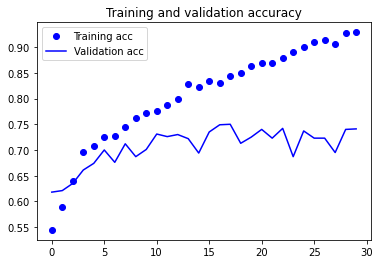

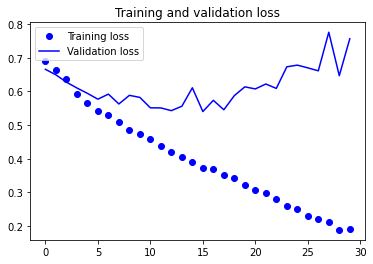

In [7]:
import matplotlib.pyplot as plt
import keras
from keras import models
from keras import layers
new_model = keras.models.load_model('cats_and_dogs_small_1.h5')
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# With data Augmentation

In [8]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

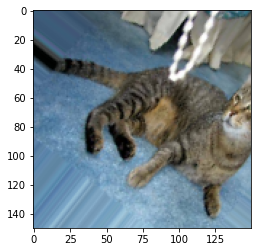

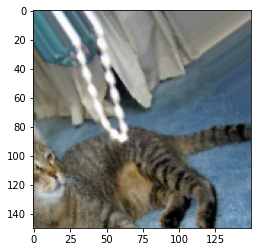

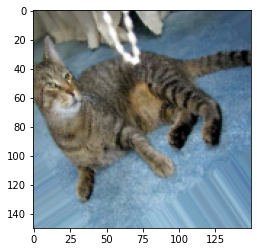

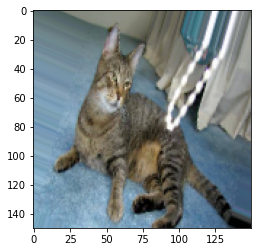

In [10]:
# This is module with image preprocessing utilities
from keras.preprocessing import image
train_cats_dir='cats_and_dogs_small/train/cats'
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 49s 492ms/step - loss: 0.6909 - acc: 0.5317 - val_loss: 0.6769 - val_acc: 0.5914
Epoch 2/100
100/100 [==============================] - 48s 483ms/step - loss: 0.6798 - acc: 0.5682 - val_loss: 0.6832 - val_acc: 0.5206
Epoch 3/100
100/100 [==============================] - 50s 496ms/step - loss: 0.6636 - acc: 0.5917 - val_loss: 0.6460 - val_acc: 0.6161
Epoch 4/100
100/100 [==============================] - 48s 484ms/step - loss: 0.6427 - acc: 0.6231 - val_loss: 0.6565 - val_acc: 0.6057
Epoch 5/100
100/100 [==============================] - 49s 490ms/step - loss: 0.6326 - acc: 0.6351 - val_loss: 0.6374 - val_acc: 0.6377
Epoch 6/100
100/100 [==============================] - 49s 488ms/step - loss: 0.6167 - acc: 0.6465 - val_loss: 0.5984 - val_acc: 0.6591
Epoch 7/100
100/100 [==============================] - 48s 483ms/step - loss: 0.6012 - acc: 0.6654 -

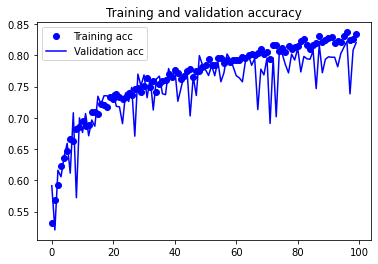

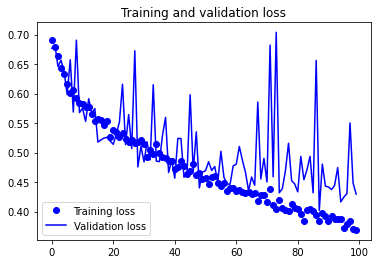

In [11]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Thanks to data augmentation and dropout, we are no longer overfitting: the training curves are rather closely tracking the validation curves. We are now able to reach an accuracy of 82%, a 15% relative improvement over the non-regularized model.

<a href="https://arxiv.org/pdf/1708.04896.pdf"  style="font-size:30px">
<center>Random Erasing Data Augmentation (2020)</a>
<img src="pics/random erase.png" width="1000"/>
    
<a href="https://arxiv.org/pdf/1412.6071.pdf"  style="font-size:30px">
<center>Fractional Max-Pooling (2015)</a>
<img src="pics/fmp.png" width="1000"/>

$\Huge  \color{Red}{\text{“You need a lot of a data if you want to
train CNNs”}}$

$\Huge  \color{Blue}{\text{Transfer Learning}}$

## A pretrained network is a saved network that was previously trained on a large dataset, typically on a large-scale image-classification task. If this original dataset is large enough and general enough, then the spatial hierarchy of features learned by the pretrained network can effectively act as a generic model of the visual world, and hence its features can prove useful for many different computervision problems, even though these new problems may involve completely different classes than those of the original task.
<img src="pics/TransferLearning.jpg" width="1000"/>

# Feature extraction
<img src="pics/TL.png" width="1000"/>



In [13]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
conv_base.summary()

58892288/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

<img src="pics/vgg16_1.png" width="1000"/>

In [15]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = 'cats_and_dogs_small'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [17]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 3s 33ms/step - loss: 0.6246 - acc: 0.6535 - val_loss: 0.4476 - val_acc: 0.8220
Epoch 2/30
100/100 [==============================] - 3s 27ms/step - loss: 0.4363 - acc: 0.7985 - val_loss: 0.3706 - val_acc: 0.8430
Epoch 3/30
100/100 [==============================] - 3s 32ms/step - loss: 0.3621 - acc: 0.8530 - val_loss: 0.3255 - val_acc: 0.8700
Epoch 4/30
100/100 [==============================] - 2s 24ms/step - loss: 0.3094 - acc: 0.8695 - val_loss: 0.2979 - val_acc: 0.8810
Epoch 5/30
100/100 [==============================] - 2s 17ms/step - loss: 0.2850 - acc: 0.8785 - val_loss: 0.2816 - val_acc: 0.8850
Epoch 6/30
100/100 [==============================] - 4s 36ms/step - loss: 0.2582 - acc: 0.8925 - val_loss: 0.2688 - val_acc: 0.8880
Epoch 7/30
100/100 [==============================] - 4s 39ms/step - loss: 0.2398 - acc: 0.9065 - val_loss: 0.2691 - val_acc: 0.8880
Epoch 8/30
100/100 [==============================] - 3s 30ms/step - 

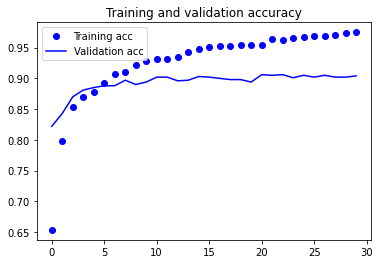

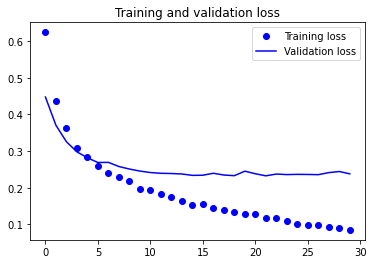

In [18]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Fine-tuning
<img src="pics/VGG16.png" width="300"/>

In [24]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [27]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))
model.save('cats_and_dogs_small_4.h5')

Epoch 1/30
100/100 [==============================] - 3s 31ms/step - loss: 0.0782 - acc: 0.9775 - val_loss: 0.2402 - val_acc: 0.9030
Epoch 2/30
100/100 [==============================] - 3s 26ms/step - loss: 0.0779 - acc: 0.9780 - val_loss: 0.2386 - val_acc: 0.9030
Epoch 3/30
100/100 [==============================] - 2s 23ms/step - loss: 0.0754 - acc: 0.9795 - val_loss: 0.2417 - val_acc: 0.8990
Epoch 4/30
100/100 [==============================] - 3s 31ms/step - loss: 0.0755 - acc: 0.9760 - val_loss: 0.2400 - val_acc: 0.9030
Epoch 5/30
100/100 [==============================] - 3s 30ms/step - loss: 0.0731 - acc: 0.9825 - val_loss: 0.2392 - val_acc: 0.9030
Epoch 6/30
100/100 [==============================] - 4s 38ms/step - loss: 0.0719 - acc: 0.9805 - val_loss: 0.2393 - val_acc: 0.9050
Epoch 7/30
100/100 [==============================] - 3s 30ms/step - loss: 0.0675 - acc: 0.9840 - val_loss: 0.2507 - val_acc: 0.8960
Epoch 8/30
100/100 [==============================] - 2s 21ms/step - 

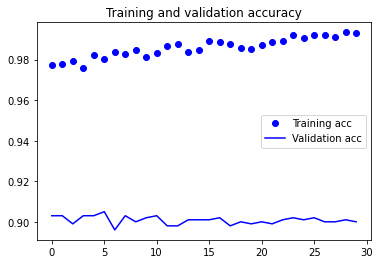

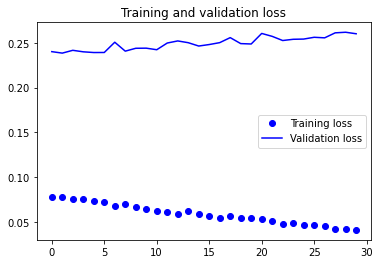

In [29]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

$\Huge  \color{Blue}{\text{Visualization}}$

## It’s often said that deep-learning models are “black boxes”: learning representations that are difficult to extract and present in a human-readable form. Although this is partially true for certain types of deep-learning models, it’s definitely not true for CNNs. 

# 1.$\color{Blue}{\text{Visualizing intermediate CNN outputs (intermediate activations)}}$—Useful for understanding how successive convnet layers transform their input, and for getting a first idea of the meaning of individual convnet filters.

# 2.$\color{Blue}{\text{Visualizing CNN filters}}$ —Useful for understanding precisely what visual pattern or concept each filter in a convnet is receptive to.
# 3. $\color{Blue}{\text{Visualizing heatmaps of class activation in an image}}$—Useful for understanding which parts of an image were identified as belonging to a given class, thus allowing you to localize objects in images.

$\huge \color{Blue}{\text{Visualizing intermediate convnet outputs }}$

In [10]:
import keras
from keras.models import load_model
from tensorflow import keras
import tensorflow as tf 

model = tf.keras.models.load_model('cats_and_dogs_small_1.h5')
model.summary()  # As a reminder.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [23]:
img_path = 'cats_and_dogs_small/test/cats/cat.1500.jpg'

# We preprocess the image into a 4D tensor
from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.

# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

(1, 150, 150, 3)


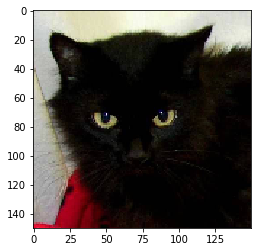

In [24]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [25]:
from keras import models

# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:8]]
# Creates a model that will return these outputs, given the model input:
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

In [26]:
# This will return a list of 5 Numpy arrays:
# one array per layer activation
activations = activation_model.predict(img_tensor)

/Users/peter/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


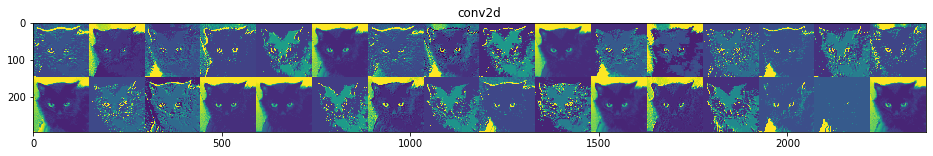

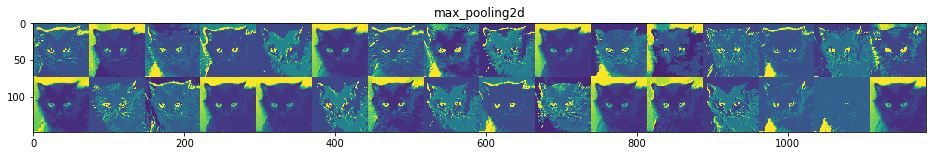

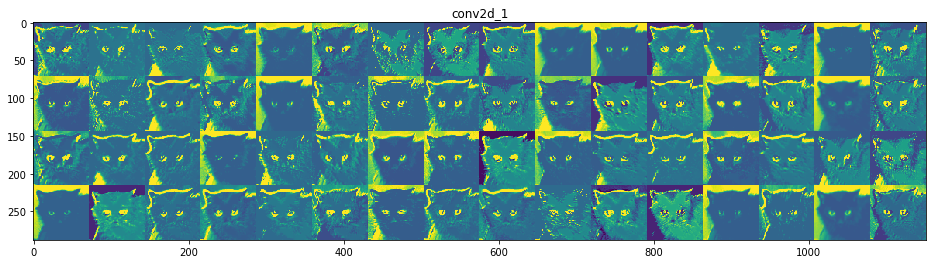

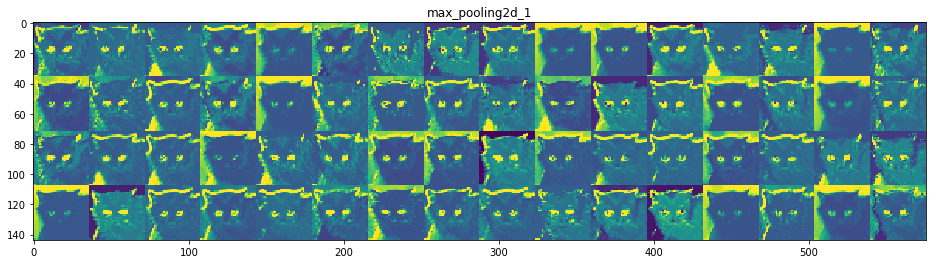

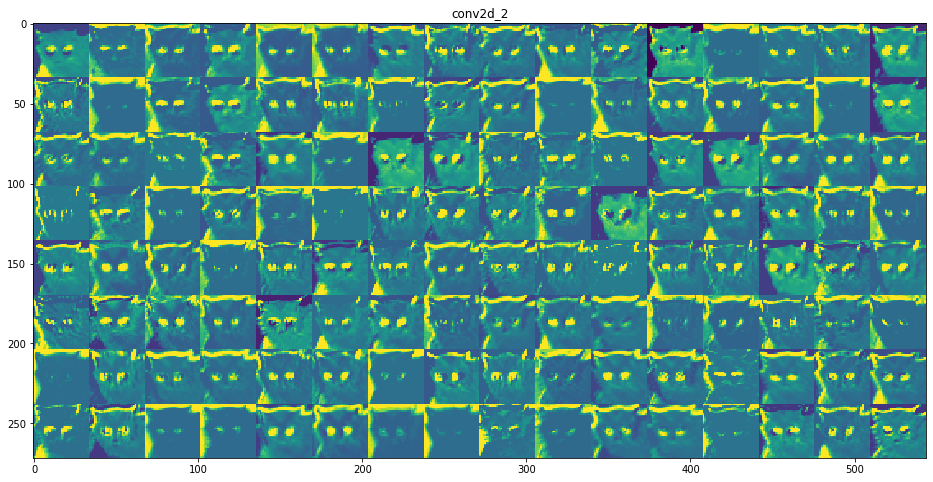

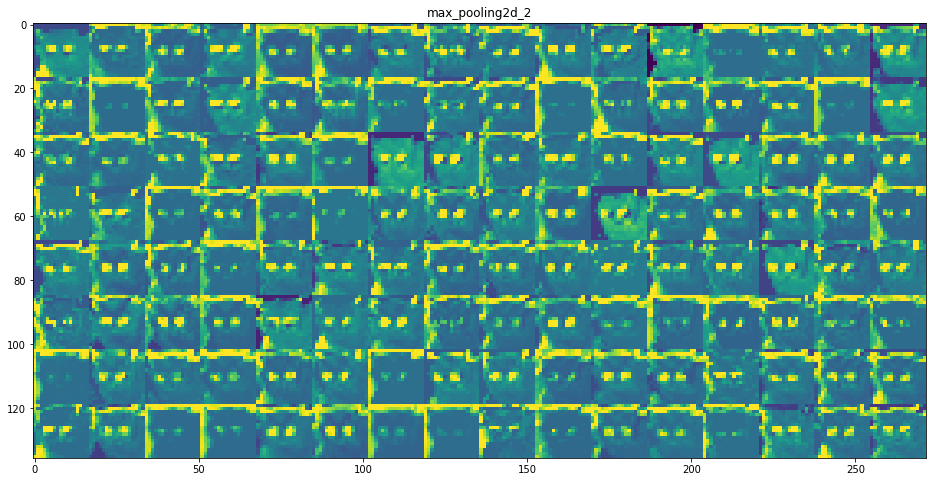

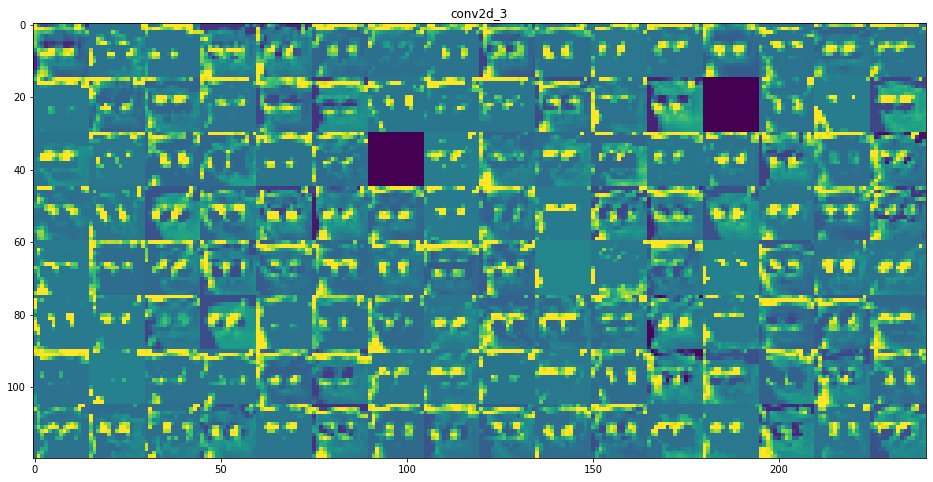

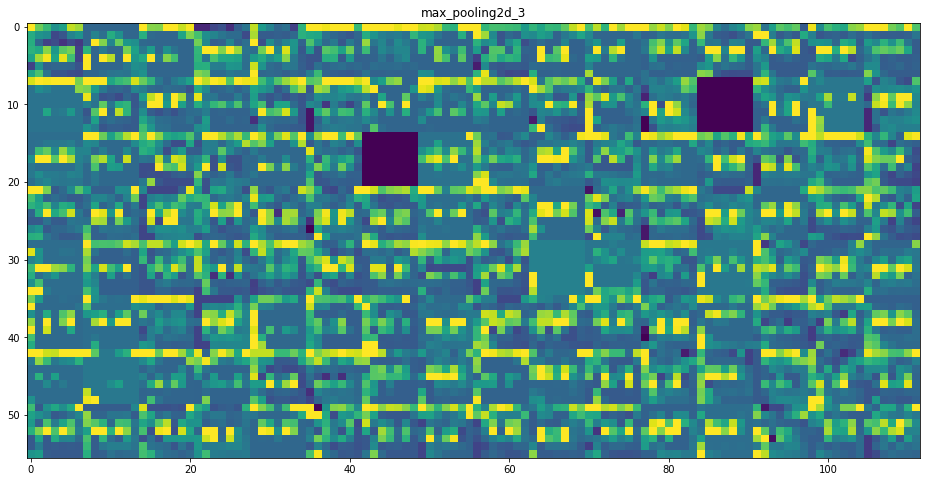

In [27]:
import keras

# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

A few remarkable things to note here:

* The first layer acts as a collection of various edge detectors. At that stage, the activations are still retaining almost all of the 
information present in the initial picture.
* As we go higher-up, the activations become increasingly abstract and less visually interpretable. They start encoding higher-level 
concepts such as "cat ear" or "cat eye". Higher-up presentations carry increasingly less information about the visual contents of the 
image, and increasingly more information related to the class of the image.
* The sparsity of the activations is increasing with the depth of the layer: in the first layer, all filters are activated by the input 
image, but in the following layers more and more filters are blank. This means that the pattern encoded by the filter isn't found in the 
input image.

## The activations (outputs) of higher layers carry less and less information about the specific input being seen, and more and more information about the target (in this case, the class of the image: cat or dog). A deep neural network effectively acts as an information distillation pipeline, with raw data going in (in this case, RGB pictures) and being repeatedly transformed so that irrelevant information is filtered out (for example, the specific visual appearance of the image), and useful information is magnified and refined (for example, the class of the image)

This is analogous to the way humans and animals perceive the world: after observing a scene for a few seconds, a human can remember which abstract objects were
present in it (bicycle, tree) but can’t remember the specific appearance of these
objects. In fact, if you tried to draw a generic bicycle from memory, chances are you
couldn’t get it even remotely right, even though you’ve seen thousands of bicycles in
your lifetime
<img src="pics/bike.png" width="700"/>

$\huge \color{Blue}{\text{Visualizing CNN filters}}$

# Simply visualizing the filters doesn't make any sense
<img src="pics/visfilter.png" width="700"/>

## Applying gradient descent to the value of the input image of a convnet so as to maximize the response of a specific filter, starting from a blank input image. The resulting input image will be one that the chosen filter is maximally responsive to.
 
 ## The process is simple: you’ll build a loss function that maximizes the value of a given filter in a given convolution layer, and then you’ll use stochastic gradient descent to adjust the values of the input image so as to maximize this activation value.

In [29]:
from keras.applications import VGG16
from keras import backend as K

model = VGG16(weights='imagenet',
              include_top=False)

layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])
# The call to `gradients` returns a list of tensors (of size 1 in this case)
# hence we only keep the first element -- which is a tensor.
grads = K.gradients(loss, model.input)[0]


58892288/58889256 [==============================] - 5s 0us/step


In [31]:
# We add 1e-5 before dividing so as to avoid accidentally dividing by 0.
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
iterate = K.function([model.input], [loss, grads])

# Let's test it:
import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

In [32]:
# We start from a gray image with some noise
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.

# Run gradient ascent for 40 steps
step = 1.  # this is the magnitude of each gradient update
for i in range(40):
    # Compute the loss value and gradient value
    loss_value, grads_value = iterate([input_img_data])
    # Here we adjust the input image in the direction that maximizes the loss
    input_img_data += grads_value * step

In [33]:
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [34]:
def generate_pattern(layer_name, filter_index, size=150):
    # Build a loss function that maximizes the activation
    # of the nth filter of the layer considered.
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])

    # Compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, model.input)[0]

    # Normalization trick: we normalize the gradient
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

    # This function returns the loss and grads given the input picture
    iterate = K.function([model.input], [loss, grads])
    
    # We start from a gray image with some noise
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.

    # Run gradient ascent for 40 steps
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return deprocess_image(img)

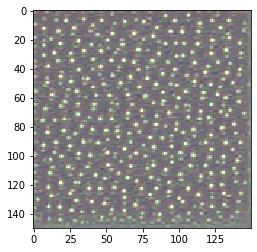

In [35]:
plt.imshow(generate_pattern('block3_conv1', 0))
plt.show()

In [ ]:
for layer_name in ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1']:
    size = 64
    margin = 5

    # This a empty (black) image where we will store our results.
    results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))

    for i in range(8):  # iterate over the rows of our results grid
        for j in range(8):  # iterate over the columns of our results grid
            # Generate the pattern for filter `i + (j * 8)` in `layer_name`
            filter_img = generate_pattern(layer_name, i + (j * 8), size=size)

            # Put the result in the square `(i, j)` of the results grid
            horizontal_start = i * size + i * margin
            horizontal_end = horizontal_start + size
            vertical_start = j * size + j * margin
            vertical_end = vertical_start + size
            results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img

    # Display the results grid
    plt.figure(figsize=(20, 20))
    plt.imshow(results)
    plt.show()

<img src="pics/filter vis.png" width="700"/>
<img src="pics/filter vis2.png" width="700"/>
<img src="pics/filter vis3.png" width="700"/>
<img src="pics/filter vis4.png" width="700"/>

These filter visualizations tell us a lot about how convnet layers see the world: each layer in a convnet simply learns a collection of 
filters such that their inputs can be expressed as a combination of the filters. This is similar to how the Fourier transform decomposes 
signals onto a bank of cosine functions. The filters in these convnet filter banks get increasingly complex and refined as we go higher-up 
in the model:

* The filters from the first layer in the model (`block1_conv1`) encode simple directional edges and colors (or colored edges in some 
cases).
* The filters from `block2_conv1` encode simple textures made from combinations of edges and colors.
* The filters in higher-up layers start resembling textures found in natural images: feathers, eyes, leaves, etc.

$\Huge \color{Blue}{\text{Visualizing heatmaps of class activation in an image}}$


## This general category of techniques is called class activation map (CAM) visualization, and it consists of producing heatmaps of class activation over input images. A class activation heatmap is a 2D grid of scores associated with a specific output class, computed for every location in any input image, indicating how important each location is with Visualizing what convnets learn respect to the class under consideration.
<img src="pics/heatmap.png" width="1000"/>

The specific implementation you’ll use is the one described in “Grad-CAM: Visual
Explanations from Deep Networks via Gradient-based Localization.”
 It’s very simple:
it consists of taking the output feature map of a convolution layer, given an input
image, and weighing every channel in that feature map by the gradient of the class
with respect to the channel. <a href="https://openaccess.thecvf.com/content_ICCV_2017/papers/Selvaraju_Grad-CAM_Visual_Explanations_ICCV_2017_paper.pdf "  style="font-size:30px">
<center>Grad-CAM:
Visual Explanations from Deep Networks via Gradient-based Localization (2017)</a>

# Intuitively, one way to understand this trick is that you’re weighting a spatial map of “how intensely the input image activates different channels” by “how important each channel is with regard to the class,” resulting in a spatial map of “how intensely the input image activates the class.”

In [9]:
from keras.applications.vgg16 import VGG16
from keras import backend as K
# Note that we are including the densely-connected classifier on top;
# all previous times, we were discarding it.
model = VGG16(weights='imagenet')

In [2]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

# The local path to our target image
img_path = 'creative_commons_elephant.jpg'

# `img` is a PIL image of size 224x224
img = image.load_img(img_path, target_size=(224, 224))

# `x` is a float32 Numpy array of shape (224, 224, 3)
x = image.img_to_array(img)

# We add a dimension to transform our array into a "batch"
# of size (1, 224, 224, 3)
x = np.expand_dims(x, axis=0)

# Finally we preprocess the batch
# (this does channel-wise color normalization)
x = preprocess_input(x)

Using TensorFlow backend.
/Users/peter/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/peter/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/peter/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/peter/opt/anaconda3/lib/python3.7/sit

In [6]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])


40960/35363 [==================================] - 0s 0us/step
Predicted: [('n02504458', 'African_elephant', 0.9094219), ('n01871265', 'tusker', 0.08618215), ('n02504013', 'Indian_elephant', 0.00435457)]


In [7]:
np.argmax(preds[0])

386

In [10]:
# This is the "african elephant" entry in the prediction vector
african_elephant_output = model.output[:, 386]

# The is the output feature map of the `block5_conv3` layer,
# the last convolutional layer in VGG16
last_conv_layer = model.get_layer('block5_conv3')

# This is the gradient of the "african elephant" class with regard to
# the output feature map of `block5_conv3`
grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

# This is a vector of shape (512,), where each entry
# is the mean intensity of the gradient over a specific feature map channel
pooled_grads = K.mean(grads, axis=(0, 1, 2))

# This function allows us to access the values of the quantities we just defined:
# `pooled_grads` and the output feature map of `block5_conv3`,
# given a sample image
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

# These are the values of these two quantities, as Numpy arrays,
# given our sample image of two elephants
pooled_grads_value, conv_layer_output_value = iterate([x])

# We multiply each channel in the feature map array
# by "how important this channel is" with regard to the elephant class
for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

# The channel-wise mean of the resulting feature map
# is our heatmap of class activation
heatmap = np.mean(conv_layer_output_value, axis=-1)

In [ ]:
import cv2

# We use cv2 to load the original image
img = cv2.imread(img_path)

# We resize the heatmap to have the same size as the original image
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

# We convert the heatmap to RGB
heatmap = np.uint8(255 * heatmap)

# We apply the heatmap to the original image
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

# 0.4 here is a heatmap intensity factor
superimposed_img = heatmap * 0.4 + img

# Save the image to disk
cv2.imwrite('elephant_cam.jpg', superimposed_img)

<img src="creative_commons_elephant.jpg" width="1000"/>
<img src="pics/elephant_cam.jpg" width="1000"/>

This visualisation technique answers two important questions:

* Why did the network think this image contained an African elephant?
* Where is the African elephant located in the picture?